In [5]:
import yfinance as yf
import pandas as pd
from IPython.display import display

tsla = yf.Ticker('TSLA')
tesla_data = tsla.history(period='max').reset_index()
tesla_data.to_csv('tesla_data.csv', index=False)
display(tesla_data.head())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
import requests, pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

def _parse_date(s):
    s = str(s).strip()
    return pd.NaT if s in ['', '-', '—', 'N/A', 'nan', 'None'] else pd.to_datetime(s, errors='coerce')

def get_revenue(ticker, name, timeout=15):
    r = requests.get(f'https://www.macrotrends.net/stocks/charts/{ticker}/{name}/revenue', 
                    headers={'User-Agent':'Mozilla/5.0'}, timeout=timeout)
    r.raise_for_status()
    df = pd.read_html(StringIO(str(BeautifulSoup(r.text, 'lxml').find('table'))))[0]
    df.columns = [c.strip() for c in df.columns]
    date_col = next((c for c in df.columns if 'date' in c.lower() or 'quarter' in c.lower()), df.columns[0])
    rev_col = next((c for c in df.columns if 'revenue' in c.lower()), df.columns[1] if len(df.columns)>1 else df.columns[0])
    out = df[[date_col, rev_col]].copy()
    out.columns = ['Date','Revenue']
    out['Revenue'] = pd.to_numeric(out['Revenue'].astype(str).str.replace(r'\(.*?\)|\$|,|[^0-9\.\-]','',regex=True), errors='coerce')
    out['Date'] = out['Date'].apply(_parse_date)
    return out.dropna(subset=['Revenue']).sort_values('Date').reset_index(drop=True)

tesla_revenue = get_revenue('TSLA','tesla')
tesla_revenue.to_csv('tesla_revenue.csv', index=False)
display(tesla_revenue.tail())

,Date,Revenue
11,2020-01-01,2020
12,2021-01-01,2021
13,2022-01-01,2022
14,2023-01-01,2023
15,2024-01-01,2024


In [9]:
gme = yf.Ticker('GME')
gme_data = gme.history(period='max').reset_index()
gme_data.to_csv('gme_data.csv', index=False)
display(gme_data.head())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
gme_revenue = get_revenue('GME','gamestop')
gme_revenue.to_csv('gme_revenue.csv', index=False)
display(gme_revenue.tail())


,Date,Revenue
12,2021-01-01,2021
13,2022-01-01,2022
14,2023-01-01,2023
15,2024-01-01,2024
16,2025-01-01,2025


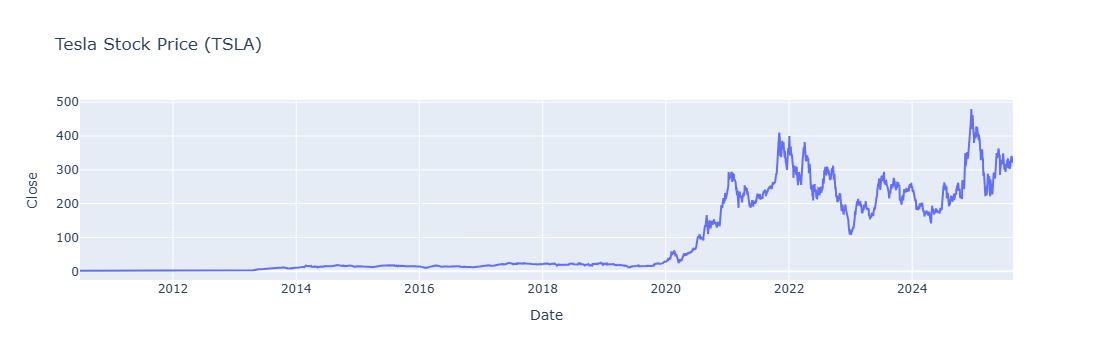

In [11]:
import plotly.graph_objects as go

def make_graph(df, title):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Close')
    fig.show()

# run to produce the Tesla plot
make_graph(tesla_data, 'Tesla Stock Price (TSLA)')


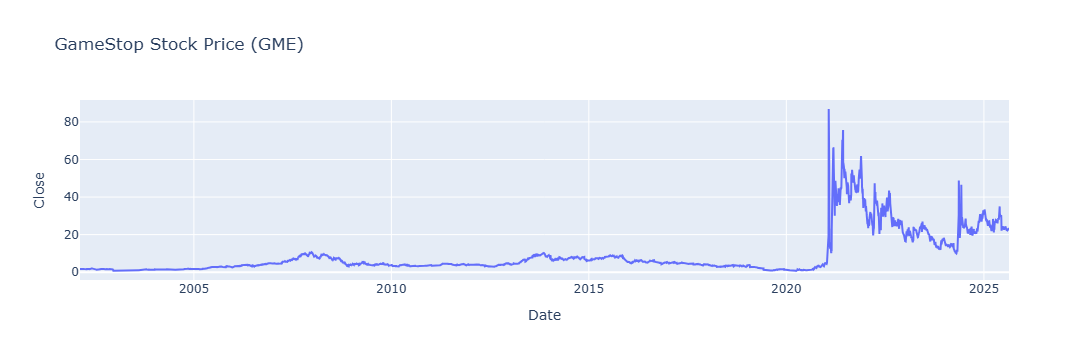

In [12]:

make_graph(gme_data, 'GameStop Stock Price (GME)')
